In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as ipw
from environs import Env
import seaborn as sns
from data_toolset.data_loading import load_dataset

In [4]:
env = Env()
env.read_env(".env")

# chargement des données

dataset_path = os.path.join(os.getcwd(), env('dataset_folder'))
df = load_dataset(dataset_path)

2784


In [5]:
tidf = df.copy() # time indexed dataframe
tidf["date"] = tidf.index
tidf.index = pd.to_datetime(tidf.index, utc=True)

In [6]:
tidf

,id,counts,status,name,user_type,photourl,date_j,date
date,,,,,,,,
2024-03-23 22:00:00+00:00,100018294,0,raw,Eco 12 - Rue de la Foret VAL DE LA HAYE,Vélo,https://filer.eco-counter-tools.com/file/da/73...,2024-03-23,2024-03-23 23:00:00+01:00
2024-03-23 22:00:00+00:00,300033642,96,raw,Eco 24 - Pont Corneille ROUEN,Vélo,https://filer.eco-counter-tools.com/file/67/18...,2024-03-23,2024-03-23 23:00:00+01:00
2024-03-23 22:00:00+00:00,300033014,1,raw,Eco 22 - Rte de Paris FRANQUEVILLE,Vélo,https://filer.eco-counter-tools.com/file/f6/3a...,2024-03-23,2024-03-23 23:00:00+01:00
2024-03-23 22:00:00+00:00,100057697,24,raw,Eco 10 - Pont Guillaume Nord ROUEN,Vélo,https://filer.eco-counter-tools.com/file/e9/1a...,2024-03-23,2024-03-23 23:00:00+01:00
2024-03-23 22:00:00+00:00,300035391,12,raw,Eco 26 - Avenue Pasteur ROUEN,Vélo,https://filer.eco-counter-tools.com/file/cf/c3...,2024-03-23,2024-03-23 23:00:00+01:00
...,...,...,...,...,...,...,...,...
2021-12-31 23:00:00+00:00,100033300,8,raw,Eco 16 - Quai Pierre Corneille ROUEN,Vélo,https://filer.eco-counter-tools.com/file/9d/b9...,2022-01-01,2022-01-01 00:00:00+01:00
2021-12-31 23:00:00+00:00,100048215,2,raw,Eco 18 - Avenue Jacques Cartier ROUEN,Vélo,https://filer.eco-counter-tools.com/file/b8/26...,2022-01-01,2022-01-01 00:00:00+01:00
2021-12-31 23:00:00+00:00,100019265,0,raw,Eco 04 - Zénith GRAND QUEVILLY,Vélo,https://filer.eco-counter-tools.com/file/f1/c9...,2022-01-01,2022-01-01 00:00:00+01:00


In [7]:
counter_name = tidf["name"].unique()
counter_name

array(['Eco 12 - Rue de la Foret VAL DE LA HAYE',
       'Eco 24 - Pont Corneille ROUEN',
       'Eco 22 - Rte de Paris FRANQUEVILLE',
       'Eco 10 - Pont Guillaume Nord ROUEN',
       'Eco 26 - Avenue Pasteur ROUEN', 'Eco 00 - Quai du Havre ROUEN',
       'Eco 02 - Chemin du Halage SOTTEVILLE',
       'Eco 19 - Bords de Seine SAHURS',
       'Eco 11 - Rue Petites Eaux du Robec ROUEN',
       "Eco 25 - Rue d'Elbeuf ROUEN",
       'Eco 13 - Route de Lyons La Forêt ROUEN',
       'Eco 28 - Pont Jaurès ELBEUF', "Eco 23 - Pont Jeanne d'Arc ROUEN",
       'Eco 21 - Rue General Leclerc ROUEN',
       'Eco 15 - Chemin du Halage ELBEUF',
       'Eco 07 - Sente des Forrieres BOIS GUILLAUME',
       'Eco 18 - Avenue Jacques Cartier ROUEN',
       'Eco 05 - Rue Boucicault MONT ST AIGNAN',
       'Eco 20 - Rue Clarin Mustad DUCLAIR',
       'Eco 17 - Boulevard Gambetta ROUEN',
       'Eco 14 - Quai Pre Aux Loups AMFREVILLE',
       'Eco 16 - Quai Pierre Corneille ROUEN',
       'Eco 09 - Avenue 

In [8]:
eco_21 = 'Eco 21 - Rue Grand Pont ROUEN'
eco_20 = "Eco 20 - Rue Clarin Mustad DUCLAIR"

In [9]:
tidf_rouen = tidf[tidf["name"]== eco_21][["counts", "date", "date_j"]]
tidf_rouen["date"] = tidf_rouen.index
tidf_rouen["day_name"] = tidf_rouen.date.dt.day_name()
tidf_rouen["hours"] = tidf_rouen.date.dt.hour
tidf_rouen['year'] = tidf_rouen['date'].dt.year
tidf_rouen['month'] = tidf_rouen['date'].dt.strftime('%B')
tidf_rouen

,counts,date,date_j,day_name,hours,year,month
date,,,,,,,
2024-01-05 22:00:00+00:00,6,2024-01-05 22:00:00+00:00,2024-01-05,Friday,22,2024,January
2024-01-05 21:00:00+00:00,10,2024-01-05 21:00:00+00:00,2024-01-05,Friday,21,2024,January
2024-01-05 20:00:00+00:00,44,2024-01-05 20:00:00+00:00,2024-01-05,Friday,20,2024,January
2024-01-05 19:00:00+00:00,44,2024-01-05 19:00:00+00:00,2024-01-05,Friday,19,2024,January
2024-01-05 18:00:00+00:00,95,2024-01-05 18:00:00+00:00,2024-01-05,Friday,18,2024,January
...,...,...,...,...,...,...,...
2022-11-09 17:00:00+00:00,140,2022-11-09 17:00:00+00:00,2022-11-09,Wednesday,17,2022,November
2022-11-09 16:00:00+00:00,181,2022-11-09 16:00:00+00:00,2022-11-09,Wednesday,16,2022,November
2022-11-09 15:00:00+00:00,121,2022-11-09 15:00:00+00:00,2022-11-09,Wednesday,15,2022,November


In [10]:
px.line(tidf_rouen, x="date",y="counts")

In [11]:
tidf_rouen_daily = tidf_rouen["counts"].groupby([pd.Grouper(freq="d")]).sum()
px.line(tidf_rouen_daily, x=tidf_rouen_daily.index,y="counts")

In [12]:
tidf_rouen_monthly = pd.DataFrame(tidf_rouen["counts"].groupby([pd.Grouper(freq="m")]).sum())
tidf_rouen_monthly["name"] = eco_21
px.bar(tidf_rouen_monthly, x=tidf_rouen_monthly.index,y="counts")

In [13]:
tidf_duclair = tidf[tidf["name"]== eco_20][["counts", "date", "date_j"]]
tidf_duclair["date"] = tidf_duclair.index
tidf_duclair["day_name"] = tidf_duclair.date.dt.day_name()
tidf_duclair["hours"] = tidf_duclair.date.dt.hour
tidf_duclair['year'] = tidf_duclair['date'].dt.year
tidf_duclair['month'] = tidf_duclair['date'].dt.strftime('%B')
tidf_duclair

,counts,date,date_j,day_name,hours,year,month
date,,,,,,,
2024-03-23 22:00:00+00:00,0,2024-03-23 22:00:00+00:00,2024-03-23,Saturday,22,2024,March
2024-03-23 21:00:00+00:00,0,2024-03-23 21:00:00+00:00,2024-03-23,Saturday,21,2024,March
2024-03-23 20:00:00+00:00,1,2024-03-23 20:00:00+00:00,2024-03-23,Saturday,20,2024,March
2024-03-23 19:00:00+00:00,0,2024-03-23 19:00:00+00:00,2024-03-23,Saturday,19,2024,March
2024-03-23 18:00:00+00:00,2,2024-03-23 18:00:00+00:00,2024-03-23,Saturday,18,2024,March
...,...,...,...,...,...,...,...
2022-09-15 15:00:00+00:00,11,2022-09-15 15:00:00+00:00,2022-09-15,Thursday,15,2022,September
2022-09-15 14:00:00+00:00,14,2022-09-15 14:00:00+00:00,2022-09-15,Thursday,14,2022,September
2022-09-15 13:00:00+00:00,7,2022-09-15 13:00:00+00:00,2022-09-15,Thursday,13,2022,September


In [14]:
tidf_duclair_monthly = pd.DataFrame(tidf_duclair["counts"].groupby([pd.Grouper(freq="m")]).sum())

tidf_duclair_monthly["name"] = eco_20
px.bar(tidf_duclair_monthly, x=tidf_duclair_monthly.index,y="counts")

In [15]:
tidf_monthly = pd.concat([tidf_rouen_monthly, tidf_duclair_monthly])
px.bar(tidf_monthly, x=tidf_monthly.index, y="counts", color="name", barmode="group")

In [16]:
tidf_duclair_hours = tidf_duclair[["counts", "hours"]].groupby("hours").mean()
tidf_rouen_hours = tidf_rouen[["counts", "hours"]].groupby("hours").mean()
tidf_duclair_hours


,counts
hours,
0,0.027574
1,0.040293
2,0.119048
3,0.238095
4,0.472527
5,1.635531
6,3.485348
7,4.542125
8,6.652015


In [17]:
tidf_duclair_hours["name"] = eco_20
tidf_duclair_hours["hours"] = tidf_duclair_hours.index
px.bar(tidf_duclair_hours, x=tidf_duclair_hours.index,y="counts")
tidf_duclair_hours

,counts,name,hours
hours,,,
0,0.027574,Eco 20 - Rue Clarin Mustad DUCLAIR,0
1,0.040293,Eco 20 - Rue Clarin Mustad DUCLAIR,1
2,0.119048,Eco 20 - Rue Clarin Mustad DUCLAIR,2
3,0.238095,Eco 20 - Rue Clarin Mustad DUCLAIR,3
4,0.472527,Eco 20 - Rue Clarin Mustad DUCLAIR,4
5,1.635531,Eco 20 - Rue Clarin Mustad DUCLAIR,5
6,3.485348,Eco 20 - Rue Clarin Mustad DUCLAIR,6
7,4.542125,Eco 20 - Rue Clarin Mustad DUCLAIR,7
8,6.652015,Eco 20 - Rue Clarin Mustad DUCLAIR,8


In [18]:
tidf_rouen_hours["name"] = eco_21
tidf_rouen_hours["hours"] = tidf_rouen_hours.index
px.bar(tidf_duclair_hours, x=tidf_duclair_hours.index,y="counts")
tidf_rouen_hours

,counts,name,hours
hours,,,
0,4.450000,Eco 21 - Rue Grand Pont ROUEN,0
1,3.049881,Eco 21 - Rue Grand Pont ROUEN,1
2,2.598575,Eco 21 - Rue Grand Pont ROUEN,2
3,3.983373,Eco 21 - Rue Grand Pont ROUEN,3
4,7.612827,Eco 21 - Rue Grand Pont ROUEN,4
5,24.695962,Eco 21 - Rue Grand Pont ROUEN,5
6,66.235154,Eco 21 - Rue Grand Pont ROUEN,6
7,70.619952,Eco 21 - Rue Grand Pont ROUEN,7
8,51.199525,Eco 21 - Rue Grand Pont ROUEN,8


In [19]:
tidf_hours = pd.concat([tidf_rouen_hours, tidf_duclair_hours])
px.bar(tidf_hours, x=["hours"], y="counts", color="name", barmode="group")

In [20]:
tidf_hours

,counts,name,hours
hours,,,
0,4.450000,Eco 21 - Rue Grand Pont ROUEN,0
1,3.049881,Eco 21 - Rue Grand Pont ROUEN,1
2,2.598575,Eco 21 - Rue Grand Pont ROUEN,2
3,3.983373,Eco 21 - Rue Grand Pont ROUEN,3
4,7.612827,Eco 21 - Rue Grand Pont ROUEN,4
5,24.695962,Eco 21 - Rue Grand Pont ROUEN,5
6,66.235154,Eco 21 - Rue Grand Pont ROUEN,6
7,70.619952,Eco 21 - Rue Grand Pont ROUEN,7
8,51.199525,Eco 21 - Rue Grand Pont ROUEN,8


In [21]:
import plotly.graph_objects as go
import pandas as pd

# Sample data
data = {
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'January': [20, 25, 30, 35, 40],
    'February': [22, 27, 32, 37, 42],
    'March': [18, 23, 28, 33, 38]
}

df = pd.DataFrame(data)
df.index = df.Day
df = df.drop(columns=["Day"])

In [22]:

fig = px.imshow(df.to_numpy(), x=df.columns, y=df.index, color_continuous_scale='Viridis', aspect="auto")
fig.update_traces(text=df.to_numpy(), texttemplate="%{text}")
fig.update_xaxes(side="top")
fig.show()


In [24]:
heatmap_column  = {
    "journaliere" : "day_name",
    "mensuelle" : "month_name",
}


def prepare_heatmap_data(df, counter_names: list, start_date=None, end_date=None, period=None, heatmap_freq='journaliere'):
    end_date = pd.to_datetime(df.index[0], ) if end_date is None else pd.to_datetime(end_date)
    
    print(end_date, type(end_date))
    if start_date is None:
        if period is not None:
            start_date = end_date - timedelta(days=period)
        else:
            start_date = pd.to_datetime(df.index[-1])
    else:
        start_date = pd.to_datetime(start_date)
    print(start_date, type(start_date))

    date_range = pd.date_range(start=start_date, end=end_date, freq="H")
    date_range = date_range.intersection(df.index)
    #data = df[df['name'].isin(counter_names)]
    data = df[["counts"]].loc[date_range].groupby([pd.Grouper(freq="h")]).mean()



    data["date"] = data.index
    data['month_name'] = data['date'].dt.strftime('%B')
    data["day_name"] = data['date'].dt.day_name()
    data["hours"] = data.date.dt.hour


    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December'
    ]

    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


    categorie = day_order if heatmap_freq == "journaliere" else month_order

    data[heatmap_column[heatmap_freq]] = pd.Categorical(data[heatmap_column[heatmap_freq]], categories=categorie, ordered=True)


    heatmap_data = data.pivot_table(index='hours', columns=heatmap_column[heatmap_freq], values='counts', aggfunc='mean', fill_value=0)

    return heatmap_data


prepare_heatmap_data(tidf,[], heatmap_freq="mensuelle")


2024-03-23 22:00:00+00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2021-12-31 23:00:00+00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


month_name,January,February,March,April,May,June,July,August,September,October,November,December
hours,,,,,,,,,,,,
0,0.990463,1.040723,1.220596,0.646578,0.610714,1.088431,0.795802,0.747957,0.933145,1.036827,1.648627,1.309711
1,0.596229,0.592765,0.775727,0.595339,0.678497,0.998892,0.794644,0.768194,0.812923,0.943393,0.935646,0.762341
2,0.534196,0.528680,0.706001,0.871184,0.970983,1.159257,1.166731,1.256550,1.313762,1.299739,0.863006,0.638943
3,1.037610,0.992554,1.119308,1.478506,1.511251,1.988954,1.811429,2.161191,2.195208,2.131528,1.291934,1.120449
4,1.361391,1.485691,1.801234,2.612897,3.692881,4.580611,3.685677,3.623984,4.125758,4.111311,2.027640,1.703666
5,2.439562,2.801253,4.799677,11.201405,14.792863,18.081220,12.464848,12.007066,17.104045,15.583284,3.931230,2.952785
6,10.707927,11.599346,17.198282,23.566754,29.447820,35.090347,25.949452,24.270754,34.578623,32.111278,15.107920,10.549163
7,21.723966,24.537175,27.930999,13.955486,17.185019,21.430940,17.380923,16.691352,19.305368,18.864086,31.351828,23.065081
8,12.154125,13.806150,15.607858,12.357792,16.235225,19.549477,17.127120,17.182063,17.348907,16.199498,16.844339,13.634694


In [27]:
from datetime import timedelta

def get_date_range(df, start_date, end_date, period=None, frequency='H'):
    end_date = pd.to_datetime(df.index[0], ) if end_date is None else pd.to_datetime(end_date, utc=True)
    
    print("end_date", end_date, type(end_date))
    if start_date is None:
        if period is not None:
            start_date = end_date - timedelta(days=period)
        else:
            start_date = pd.to_datetime(df.index[-1])
    else:
        start_date = pd.to_datetime(start_date, utc=True)
    print("start_date", start_date, type(start_date))

    date_range = pd.date_range(start=start_date, end=end_date, freq=frequency)
    date_range = date_range.intersection(df.index)
    return date_range

get_date_range(tidf, start_date="2023-01-01", end_date=None)

end_date 2024-03-23 22:00:00+00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
start_date 2023-01-01 00:00:00+00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output, State
import dash_leaflet as dl
from dash_leaflet import CircleMarker
import geopandas as gpd
import requests



# lat1 = 49.4431
# lon1 = 1.0993
# Exemple de GeoJSON (remplacez-le par vos propres données GeoJSON)
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {},
            "geometry": {
                "type": "Point",
                "coordinates": [1.0993, 49.4431]  # Exemple de coordonnées (lon, lat)
            }
        }
    ]
}
app = Dash()
# Récupération des données depuis l'API et création du DataFrame
api_url_localisation = "https://data.metropole-rouen-normandie.fr/api/explore/v2.1/catalog/datasets/eco-counter-sites/records?limit=29"
response_localisation = requests.get(api_url_localisation)

if response_localisation.status_code != 200:
    print(f'Échec de la requête HTTP, code de statut {response_localisation.status_code}')
    data_localisation = None
else:
    data_localisation = response_localisation.json()

data_localisation_df = pd.DataFrame(data_localisation['results'])
# Ajout de la colonne 'Month-Year' à df
df['Month-Year'] = df['Month'].astype(str) + '-' + df['Year'].astype(str)

# Fusion des DataFrames df et data_localisation_df sur la colonne 'name'
df_merged = pd.merge(df, data_localisation_df[['name', 'coordinates']], how='left', on='name')

# Création d'une liste de tous les mois de janvier 2022 à janvier 2024
months = df_merged['Month-Year'].unique()

# Création de la liste de dictionnaires
result_data = []
for mois in months:
    for nom in df_merged['name'].unique():
        filtered_data = df_merged[(df_merged['name'] == nom) & (df_merged['Month-Year'] == mois)]
        sum_count = filtered_data['counts'].sum()
        result_data.append({'mois': mois, 'name': nom, 'volume_month': sum_count})

df_result = pd.DataFrame(result_data)


# Define the default latitude and longitude
lat = data_localisation['results'][5]['coordinates']['lat']
lon = data_localisation['results'][5]['coordinates']['lon']

# Create the layout of the app
app.layout = html.Div([
    html.Div([
        html.Div(['Select Month'], style={'width': '37%', 'display': 'inline-block'}),
        dcc.Dropdown(
            id='month-dropdown',
            options=[{'label': month, 'value': month} for month in df_result['mois'].unique()],
            value=df_result['mois'][0],
            placeholder='Select a month'
        )
    ]),
    html.Div([
        html.H2('Add Shapes to Map an Area of Interest'),
        dl.Map(
            id='leaflet-map',
            style={'width': '100%', 'height': '50vh'},
            center=[lat, lon],
            zoom=10,
            children=[
                dl.TileLayer(),
                dl.FeatureGroup([
                    dl.EditControl(id="edit_control"),
                ]),
                dl.GeoJSON(id='map-geojsons', data=geojson_data)  # Ajout de la couche GeoJSON
            ]
        )
    ])
])

# Define the callback to update the circle radius
@app.callback(
    Output('leaflet-map', 'children'),
    [Input('month-dropdown', 'value')]
   
)
def update_map(selected_time):
    map_children = [
        dl.TileLayer(url="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png")
    ]
    
    # Si la valeur sélectionnée est nulle, utilisez le premier mois de la liste
    if not selected_time:
        selected_time = df_result['mois'].iloc[0]
    
    max_volume = df_result['volume_month'].max()
    
    for record in data_localisation['results']:
        lon = record['coordinates']['lon']
        lat = record['coordinates']['lat']
      
        filtered_data = df_result[(df_result['mois'] == selected_time) & (df_result['name'] == record['name'])]
        volume = filtered_data['volume_month'].iloc[0] if not filtered_data.empty else 0
        
        scaled_radius = int(volume / max_volume * 50)
        
        circle_marker = dl.CircleMarker(center=(lat, lon), radius=scaled_radius, color="red", fillColor="red")
        map_children.append(circle_marker)
    
    # Ajouter la couche GeoJSON (exemple fictif)
    map_children.append(dl.GeoJSON(data=geojson_data))
    
    return map_children



if __name__ == '__main__':
    app.run_server(debug=True, port=8054)

In [31]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'tidf' is your DataFrame containing the data

# Grouper par date et calculer la somme des passages pour chaque jour
daily_counts = tidf.groupby('date_j')['counts'].sum().reset_index()

# Trier par ordre décroissant pour obtenir les jours les plus fréquentés en premier
top_10_days = daily_counts.sort_values(by='counts', ascending=False).head(10)


In [39]:
# Créer la figure
fig = go.Figure()

# Ajouter un trace de barres
fig.add_trace(go.Bar(
    x=top_10_days['date_j'],
    y=top_10_days['counts'],
    marker_color='blueviolet',
    name='Passages Journaliers'
))

# Mettre en forme la figure
fig.update_layout(
    title='Top 10 des Jours les Plus Fréquentés (Sommes Journalières)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Passages Journaliers'),
    xaxis_tickangle=-45,  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
    bargap=0.1,  # Espacement entre les barres
    margin=dict(l=50, r=50, t=80, b=50),  # Marge pour éviter que le titre ne se superpose aux données
)

# Ajouter les annotations des valeurs
for idx, value in enumerate(top_10_days['counts']):
    fig.add_annotation(
        x=top_10_days['date_j'].iloc[idx],
        y=value + 50,
        text=str(value),
        showarrow=False,
        font=dict(color='black', size=12),
        xshift=0,
        yshift=0
    )

# Afficher la figure
fig.show()

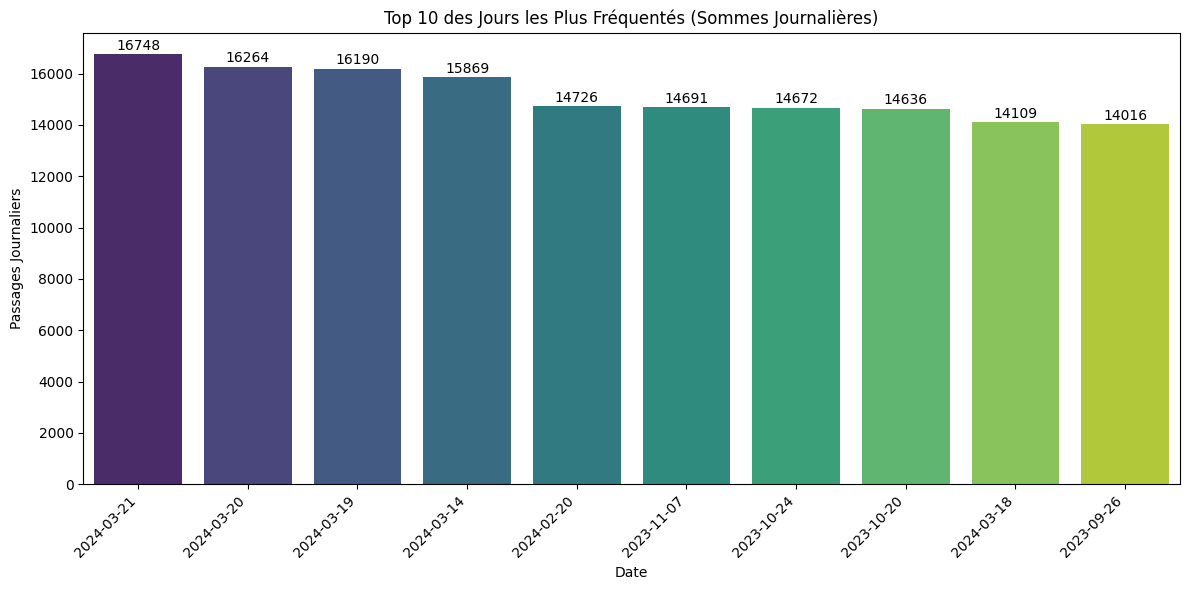

In [42]:
# Grouper par date et calculer la somme des passages pour chaque jour
daily_counts = tidf.groupby('date_j')['counts'].sum().reset_index()

# Trier par ordre décroissant pour obtenir les jours les plus fréquentés en premier
top_10_days = daily_counts.sort_values(by='counts', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='date_j', y='counts', hue='date_j', data=top_10_days, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 des Jours les Plus Fréquentés (Sommes Journalières)')
plt.xlabel('Date')
plt.ylabel('Passages Journaliers')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.tight_layout()

for idx, value in enumerate(top_10_days['counts']):
    bar_plot.text(idx, value + 50, str(value), ha='center', va='bottom')

In [53]:
top_10_days["date_j"]

top_10_days['date_j'] = pd.to_datetime(top_10_days['date_j'], format='%Y-%m-%d')
top_10_days['date_j'] = top_10_days['date_j'].dt.strftime('%d %B %Y')

top_10_days

,date_j,counts
806,21 March 2024,16748
805,20 March 2024,16264
804,19 March 2024,16190
799,14 March 2024,15869
776,20 February 2024,14726
675,07 November 2023,14691
661,24 October 2023,14672
657,20 October 2023,14636
803,18 March 2024,14109
633,26 September 2023,14016


In [54]:
import plotly.express as px


top_10_days['date_j'] = pd.to_datetime(top_10_days['date_j'], format='%Y-%m-%d')
top_10_days['date_j'] = top_10_days['date_j'].dt.strftime('%d %B %Y')

# Créer le graphique à barres interactif avec Plotly
fig = px.bar(top_10_days, x='date_j', y='counts', color='date_j', title='Top 10 des Jours les Plus Fréquentés (Sommes Journalières)',
             labels={'date_j': 'Date', 'counts': 'Passages Journaliers'})

# Personnaliser l'apparence du graphique
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.update_yaxes(title_text='Passages Journaliers')
fig.update_layout(showlegend=False)

# Afficher le graphique
fig.show()
